In [1]:
%matplotlib inline

import pandas as pd
import pandas.io.sql as psql
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pymysql.cursors

plt.style.use('ggplot') 
font = {'family' : 'meiryo'}
matplotlib.rc('font', **font)

In [2]:
connecter = pymysql.connect(host='localhost',
                             user='matsumoto',
                             password='ud0nud0n',
                             db='matsumoto',
                             charset='utf8')

In [3]:
sql = "select * from MERCARI_DATA2 where date between '2016-12-28 18:30:00' and '2017-01-12 19:30'"
df = psql.read_sql(sql, connecter)

In [4]:
df

id                date  required_time sold_or_not  page_number  \
0      m683244002 2016-12-28 18:31:02          14428         YES            3   
1      m204018936 2016-12-28 18:33:13           2817         YES            1   
2      m837264150 2016-12-28 18:34:59          64931          NO            3   
3      m332014740 2016-12-28 18:35:56          65451          NO            4   
4      m308091567 2016-12-28 18:37:07            580         YES           26   
5      m545181307 2016-12-28 18:37:42           1879         YES            1   
6      m355104548 2016-12-28 18:37:50           2837         YES            2   
7      m302497008 2016-12-28 18:37:52            461         YES           31   
8      m691975574 2016-12-28 18:38:40          17020         YES            7   
9      m837596719 2016-12-28 18:39:06          25536         YES            9   
10     m874119688 2016-12-28 18:39:29          34578         YES           11   
11     m906252098 2016-12-28 18:40:07          67432         YES           15   
12     m526151582 2016-12-28 18:41:58            963         YES           10   
13     m374198683 2016-12-28 18:42:01           1205         YES           27   
14     m875007730 2016-12-28 18:43:08          65314          NO            7   
15     m789184310 2016-12-28 18:43:13          65317          NO            7   
16     m763819029 2016-12-28 18:44:39          85686         YES           64   
17     m259851893 2016-12-28 18:47:13          84537         YES           74   
18     m149675242 2016-12-28 18:47:21           1411         YES           11   
19     m836487867 2016-12-28 18:49:43          62849         YES            7   
20     m855620780 2016-12-28 18:49:49          64984          NO            7   
21     m524742430 2016-12-28 18:50:27          65001          NO            3   
22     m709972692 2016-12-28 18:51:41           1610         YES           11   
23     m423120701 2016-12-28 18:51:58           1826         YES           10   
24     m961314289 2016-12-28 18:52:25           1806         YES           13   
25     m943215158 2016-12-28 18:52:45           1468         YES           19   
26     m312334417 2016-12-28 18:53:24              0         YES            1   
27     m907782738 2016-12-28 18:53:32            955         YES            1   
28     m227770300 2016-12-28 18:53:43           2839         YES            2   
29     m868656365 2016-12-28 18:53:58           6643         YES            3   
...           ...                 ...            ...         ...          ...   
22403  m280137309 2017-01-12 18:48:45          76383         YES           18   
22404  m826707921 2017-01-12 18:49:52          21910         YES           25   
22405  m706106487 2017-01-12 18:49:57          85003         YES           94   
22406  m670627190 2017-01-12 18:53:10          65417          NO            4   
22407  m367965003 2017-01-12 18:55:09          78030         YES           10   
22408  m806172350 2017-01-12 18:57:21          66297          NO            7   
22409  m684460870 2017-01-12 18:57:25          66301          NO            7   
22410  m736385402 2017-01-12 18:59:06          21533         YES           10   
22411  m358023689 2017-01-12 18:59:20          23535         YES           11   
22412  m522089935 2017-01-12 19:00:24          15704         YES           56   
22413  m948699461 2017-01-12 19:01:04          71219         YES           58   
22414  m526468850 2017-01-12 19:01:34          65523          NO           18   
22415  m766428290 2017-01-12 19:01:41          65525          NO           18   
22416  m301944070 2017-01-12 19:01:57          65531          NO           19   
22417  m393081521 2017-01-12 19:03:16          44323         YES           26   
22418  m314572702 2017-01-12 19:04:55           4141         YES           73   
22419  m647120441 2017-01-12 19:05:29            622         YES           72   
22420  m396158513 2017-01-12 19:05:42         

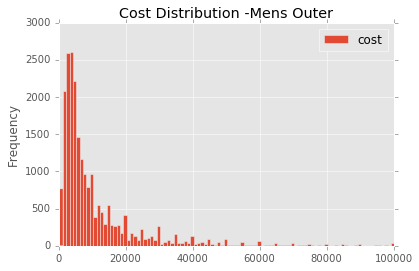

In [12]:
df.plot( y=['cost'], bins=10000, kind='hist', xlim = [0, 100000], title = "Cost Distribution -Mens Outer")

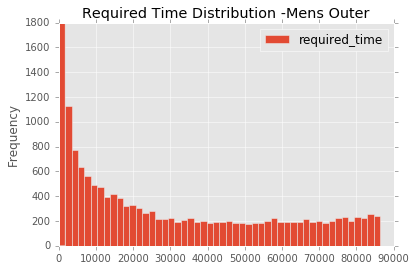

In [11]:
df[df.sold_or_not=="YES"].plot( y=['required_time'], bins=50, kind='hist', xlim = [0, 90000], title = "Required Time Distribution -Mens Outer")

In [7]:
df.sold_or_not.value_counts()

YES    15706
NO      6727
Name: sold_or_not, dtype: int64

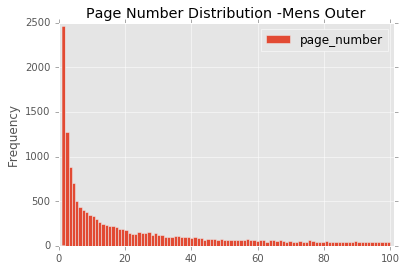

In [8]:
df[df.sold_or_not=="YES"].plot( y=['page_number'], bins=100, kind='hist', xlim = [0, 101], title = "Page Number Distribution -Mens Outer")

In [9]:
df.category3.value_counts()

category-318    6562
category-321    3917
category-314    2026
category-324    1691
category-319    1535
category-317    1451
category-316    1413
category-322    1264
category-323     934
category-327     829
category-326     811
Name: category3, dtype: int64

In [13]:
df.product_size.value_counts()

M           8993
L           6306
S           3987
XL          1823
FREESIZE     605
XS以下         362
XL以上         346
no size       11
Name: product_size, dtype: int64

In [14]:
df.product_condition.value_counts()

目立った傷や汚れなし    10127
新品、未使用         4780
未使用に近い         3567
やや傷や汚れあり       3066
傷や汚れあり          795
全体的に状態が悪い        98
Name: product_condition, dtype: int64

In [15]:
df.seller_address.value_counts()

東京都     4043
大阪府     2424
神奈川県    1953
埼玉県     1408
愛知県     1345
兵庫県     1141
千葉県     1120
福岡県      910
北海道      772
静岡県      491
京都府      481
新潟県      419
茨城県      375
宮城県      335
岐阜県      326
岡山県      313
広島県      300
奈良県      255
滋賀県      252
栃木県      250
群馬県      227
福島県      218
三重県      218
熊本県      199
長野県      181
山口県      179
石川県      170
和歌山県     169
愛媛県      168
青森県      157
大分県      140
岩手県      135
山形県      134
沖縄県      122
鹿児島県     122
富山県      120
香川県      118
長崎県      116
宮崎県      104
秋田県       92
山梨県       84
福井県       83
鳥取県       65
佐賀県       62
徳島県       52
島根県       45
高知県       40
Name: seller_address, dtype: int64

In [17]:
df.brand_name.value_counts()

no brand             7048
\nザノースフェイス\n          996
\nユニクロ\n              691
\nナイキ\n               611
\nモンクレール\n            496
\nバーバリー\n             358
\nナノユニバース\n           343
\nラルフローレン\n           333
\nパタゴニア\n             320
\nシュプリーム\n            282
\nアディダス\n             280
\nショット\n              274
\nザラ\n                264
\nトミーヒルフィガー\n         236
\nアーバンリサーチ\n          235
\nアヴィレックス\n           229
\nリーバイス（R）\n          212
\nユナイテッドアローズ\n        205
\nコムデギャルソン\n          200
\nギャップ\n              191
\nハレ\n                187
\nディーゼル\n             177
\nビームス\n              166
\nアルファインダストリーズ\n      161
\nポールスミス\n            152
\nコロンビア\n             150
\nジャーナルスタンダード\n       146
\nアディダスオリジナルス\n       136
\nアルファ\n              135
\nアンダーカバー\n           135
                     ... 
\nスタンダードカリフォルニア\n       1
\nサンサーフ\n               1
\nグルービジョンズ\n            1
\nコスチュームナショナル\n         1
\nドクターマーチン\n            1
\nトラサルディ\n              1
\nゴーライト\n               1
\nモンタージュ\n  

In [18]:
df.delivery_charger.value_counts()

送料込み(出品者負担)    19874
着払い(購入者負担)      2559
Name: delivery_charger, dtype: int64

In [19]:
df.time_to_ship.value_counts()

2~3日で発送    11886
4~7日で発送     6530
1~2日で発送     4017
Name: time_to_ship, dtype: int64